### Problem Statement

Given dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Handled class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [1]:
import pandas as pd

### Data Preparation and Exploration

In [4]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [5]:
df.isna().sum()


age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

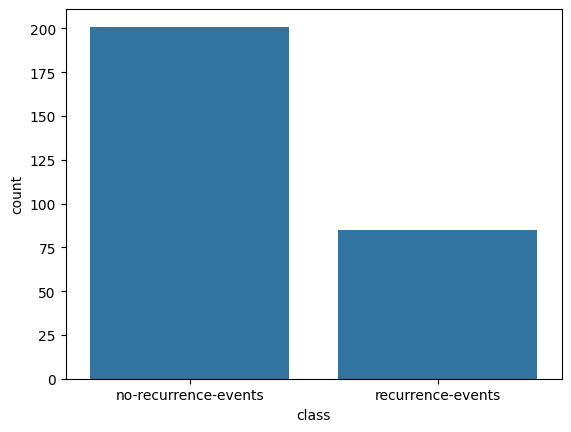

In [14]:
import seaborn as sns
sns.countplot(data=df,x='class')

In [15]:
df.age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [19]:
df = pd.get_dummies(data=df,columns=['age','menopause','tumor-size','inv-nodes','node-caps','breast','breast-quad','irradiat'],drop_first=True)


### Logistic Regression Model Without Handling Class Imbalance

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('class',axis=1)
y = df['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.88      0.81        41
   recurrence-events       0.50      0.29      0.37        17

            accuracy                           0.71        58
           macro avg       0.62      0.59      0.59        58
        weighted avg       0.68      0.71      0.68        58



### Handling Class Imbalance Using Undersampling


In [44]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
y_train.value_counts(),y_train_rus.value_counts()



(class
 no-recurrence-events    160
 recurrence-events        68
 Name: count, dtype: int64,
 class
 no-recurrence-events    68
 recurrence-events       68
 Name: count, dtype: int64)

In [50]:
model_us = LogisticRegression()
model_us.fit(X_train_rus,y_train_rus)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [51]:
y_pred_us = model_us.predict(X_test)
report = classification_report(y_test,y_pred_us)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.81      0.54      0.65        41
   recurrence-events       0.39      0.71      0.50        17

            accuracy                           0.59        58
           macro avg       0.60      0.62      0.57        58
        weighted avg       0.69      0.59      0.60        58



### Handling Class Imbalance Using SMOTE (Oversampling)


In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

y_train.value_counts(),y_train_smote.value_counts()

(class
 no-recurrence-events    160
 recurrence-events        68
 Name: count, dtype: int64,
 class
 recurrence-events       160
 no-recurrence-events    160
 Name: count, dtype: int64)

In [57]:
model_smote = LogisticRegression()

model_smote.fit(X_train_smote,y_train_smote)

y_pred_smote = model_smote.predict(X_test)
report = classification_report(y_test,y_pred_smote)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58



### Handling Class Imbalance Using SMOTE Tomek Links


In [62]:
from imblearn.combine import SMOTETomek

tomek = SMOTETomek(random_state=42)

X_train_tomek,y_train_tomek = tomek.fit_resample(X_train,y_train)

y_train.value_counts(),y_train_tomek.value_counts()

(class
 no-recurrence-events    160
 recurrence-events        68
 Name: count, dtype: int64,
 class
 recurrence-events       148
 no-recurrence-events    148
 Name: count, dtype: int64)

In [60]:
model_tomek = LogisticRegression()
model_tomek.fit(X_train_tomek,y_train_tomek)
y_pred_tomek = model_tomek.predict(X_test)
report = classification_report(y_test,y_pred_tomek)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58

